In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from tqdm import tqdm
from PIL import Image

**CARS196 data**

[Link](https://paperswithcode.com/dataset/stanford-cars) to CARS196 Dataset

Downloading the data:

In [2]:
ds = tfds.load('cars196', split='train', as_supervised=True, shuffle_files=True) # this is tf.data.Dataset

2022-05-22 23:56:19.883395: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
dataset = list(ds.as_numpy_iterator()) # this is list of tuples where tuple[0] is numpy ndarray (image) and tuple[1] is int (label)

In [ ]:
images = []
for image,_ in tqdm(dataset):
    if len(image.shape)==3:
        images.append(resize(image,(400, 600),anti_aliasing=True))

imgdata = np.concatenate(images)
imgdata.shape

## Analyzing image sizes

Fetching image, its label and shape - height, width and depth

In [ ]:
images = []
shapes = []
height, width, depth = [],[],[]
labels = []
for pair in dataset:
    img = pair[0]
    images.append(img)
    shapes.append(img.shape)
    height.append(img.shape[0])
    width.append(img.shape[1])
    depth.append(img.shape[2])
    labels.append(pair[1])

Putting info into df

In [ ]:
df = pd.DataFrame({"image": images, "shape": shapes, "height": height, "width": width, "depth": depth, "label": labels})
df.sample(4)

,image,shape,height,width,depth,label
5363,"[[[204, 140, 96], [207, 144, 100], [211, 150, ...","(816, 1200, 3)",816,1200,3,163
2317,"[[[36, 40, 39], [39, 43, 42], [46, 50, 49], [5...","(315, 500, 3)",315,500,3,185
556,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","(600, 800, 3)",600,800,3,160
0,"[[[20, 24, 23], [20, 24, 23], [20, 24, 23], [2...","(341, 480, 3)",341,480,3,159


Calculating aspect ratio of images

In [ ]:
df["ratio"] = df.apply(lambda row: row["width"]/row["height"],axis=1)

Trying to count different shapes and we can see that there are many different shapes

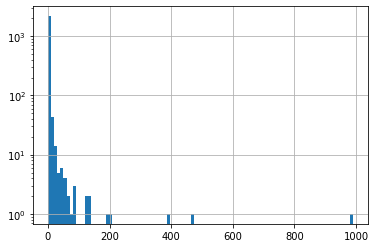

In [7]:
shape_cnt = df.groupby("shape")["image"].count().reset_index()
shape_cnt.columns = ["shape","count"]
shape_cnt["count"].hist(bins=100)
plt.yscale("log")

Height distribution

<AxesSubplot:>

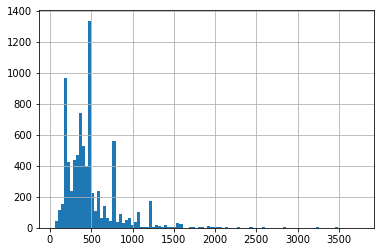

In [8]:
df.height.hist(bins=100)

Width distribution

<AxesSubplot:>

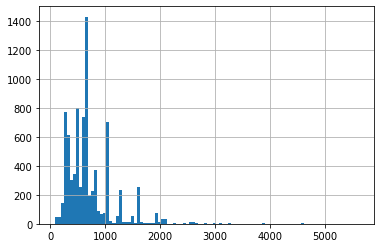

In [9]:
df.width.hist(bins=100)

Aspect ratio distribution

<AxesSubplot:>

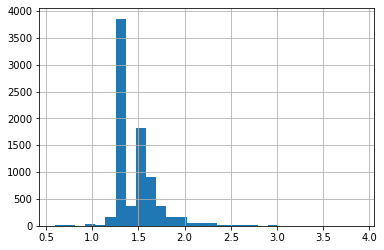

In [10]:
df.ratio.hist(bins=30)

Statistics of shapes

In [11]:
df.describe()

,height,width,depth,label,ratio
count,8144.000000,8144.000000,8144.0,8144.000000,8144.000000
mean,482.748404,699.816675,3.0,97.979371,1.473632
std,317.565971,450.920991,0.0,56.503148,0.232855
min,57.000000,78.000000,3.0,0.000000,0.593066
25%,290.000000,429.000000,3.0,49.000000,1.333333
50%,424.000000,637.000000,3.0,98.000000,1.348485
75%,540.000000,800.000000,3.0,147.000000,1.519757
max,3744.000000,5616.000000,3.0,195.000000,3.887538


Height vs Width

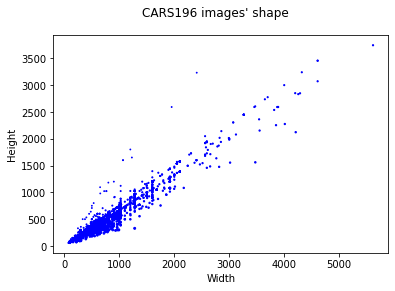

In [12]:
plt.figure() #figsize=(10,10))
plt.scatter(x=df.width.values,y=df.height.values,s=df.ratio.values,c="blue")
plt.xlabel("Width")
plt.ylabel("Height")
plt.suptitle("CARS196 images' shape")
plt.show()

Adding restrictions to width and height

In [13]:
cond1 = df["width"]<=2000
cond2 = df["height"]<=1500
df[cond1 & cond2].shape[0]/df.shape[0]

0.9810903732809431

In [14]:
df_sel = df[cond1 & cond2]

Plotting width and height again

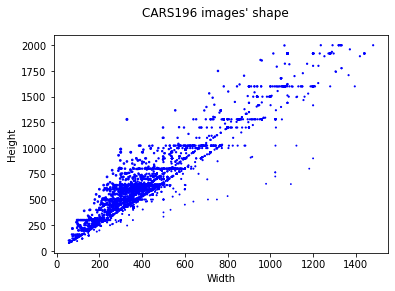

In [15]:
plt.figure() #figsize=(10,10))
plt.scatter(x=df_sel.height.values,y=df_sel.width.values,s=df_sel.ratio.values,c="blue")
plt.xlabel("Width")
plt.ylabel("Height")
plt.suptitle("CARS196 images' shape")
plt.show()

Distribution of aspect ratio now

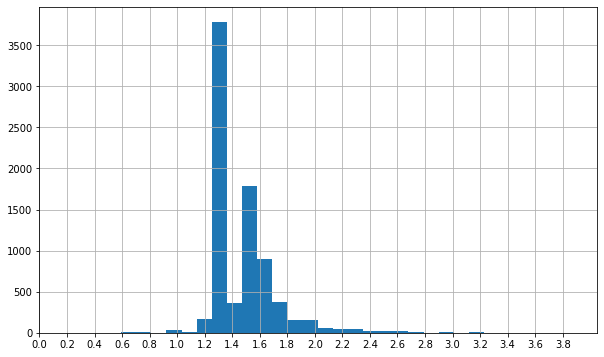

In [16]:
plt.figure(figsize=(10,6))
df_sel.ratio.hist(bins=30)
plt.xticks(np.arange(0.,4.,0.2))
plt.show()

Adding second restrictions to image shapes

In [17]:
cond3 = df_sel["ratio"]>=1.2
cond4 = df_sel["ratio"]<=1.8
df_sel[cond3 & cond4].shape[0]/df_sel.shape[0], df_sel[cond3 & cond4].shape[0]/df.shape[0]

(0.9096370463078849, 0.8924361493123772)

In [18]:
df_sel2 = df_sel[cond3 & cond4]

Height vs Width again

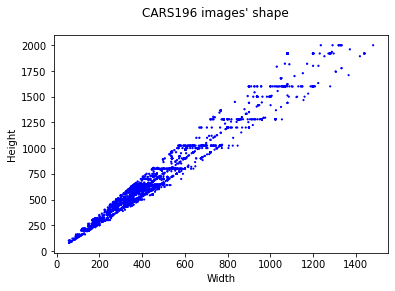

In [19]:
plt.figure() #figsize=(10,10))
plt.scatter(x=df_sel2.height.values,y=df_sel2.width.values,s=df_sel2.ratio.values,c="blue")
plt.xlabel("Width")
plt.ylabel("Height")
plt.suptitle("CARS196 images' shape")
plt.show()

## Looking at images in dataset:

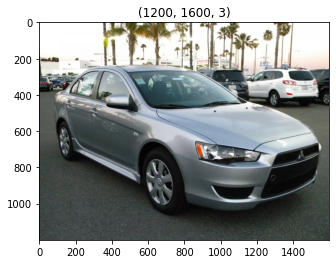

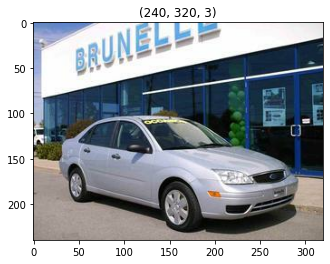

In [30]:
import matplotlib.pyplot as plt

plt.imshow(df.loc[2010,"image"])
plt.title(df.loc[2010,"shape"])
plt.show()
plt.imshow(df.loc[7544,"image"])
plt.title(df.loc[7544,"shape"])
plt.show()

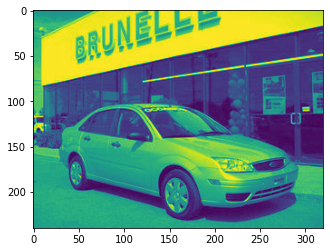

In [31]:


image = color.rgb2gray(df.loc[7544,"image"])
plt.imshow(image)

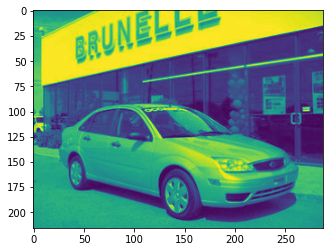

In [32]:
image_rescaled = rescale(image, 0.9, anti_aliasing=False)
plt.imshow(image_rescaled)

(400, 600)


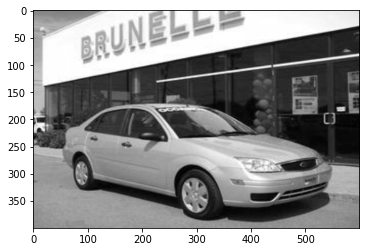

In [38]:
image_resized = resize(image, (400, 600), anti_aliasing=True)
print(image_resized.shape)
plt.imshow(image_resized,cmap='gray')
plt.show()

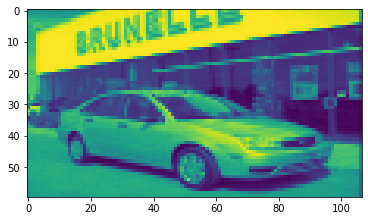

In [34]:
image_downscaled = downscale_local_mean(image, (4, 3))
plt.imshow(image_downscaled)